# Meat Consumption Dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import warnings
from itertools import product
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
dMeat = pd.read_csv(r"C:\Users\Ahmad1\Documents\GitHub\ie423-2024-termproject-the-a-team\DataSets\MeatConsumption\meat_consumption_worldwide.csv")

In [3]:
print("Columns within the data-set:")
dMeat.columns

Columns within the data-set:


Index(['LOCATION', 'SUBJECT', 'MEASURE', 'TIME', 'Value'], dtype='object')

In [4]:
print(dMeat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13760 entries, 0 to 13759
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  13760 non-null  object 
 1   SUBJECT   13760 non-null  object 
 2   MEASURE   13760 non-null  object 
 3   TIME      13760 non-null  int64  
 4   Value     13760 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 537.6+ KB
None


In [5]:
dMeat.head

<bound method NDFrame.head of       LOCATION SUBJECT     MEASURE  TIME      Value
0          AUS    BEEF      KG_CAP  1991  27.721815
1          AUS    BEEF      KG_CAP  1992  26.199591
2          AUS    BEEF      KG_CAP  1993  26.169094
3          AUS    BEEF      KG_CAP  1994  25.456134
4          AUS    BEEF      KG_CAP  1995  25.340226
...        ...     ...         ...   ...        ...
13755      MYS   SHEEP  THND_TONNE  2022  44.154151
13756      MYS   SHEEP  THND_TONNE  2023  44.897588
13757      MYS   SHEEP  THND_TONNE  2024  45.612107
13758      MYS   SHEEP  THND_TONNE  2025  46.325312
13759      MYS   SHEEP  THND_TONNE  2026  47.047207

[13760 rows x 5 columns]>

In [6]:
# Check data types of each column and a sample from the dataset
dMeat.dtypes

LOCATION     object
SUBJECT      object
MEASURE      object
TIME          int64
Value       float64
dtype: object

The code provides an overview of the data types of each column in the DataFrame `dMeat`.
This information is useful for understanding the structure of the dataset and for performing appropriate data manipulations and analyses.

In [7]:
dMeat.sample(5)

,LOCATION,SUBJECT,MEASURE,TIME,Value
6879,EU28,SHEEP,THND_TONNE,2004,1395.056681
7911,NOR,SHEEP,THND_TONNE,2003,24.684000
6322,OECD,BEEF,KG_CAP,2018,14.557548
3465,KAZ,POULTRY,KG_CAP,2001,3.945716
1299,DZA,SHEEP,KG_CAP,1998,5.279383


In [8]:
dMeat.shape

(13760, 5)

In [9]:
dMeat.index

RangeIndex(start=0, stop=13760, step=1)

### Missing Values
Checking for missing values in each column.

In [10]:
missingvals = dMeat.isnull().sum()
print(missingvals)

LOCATION    0
SUBJECT     0
MEASURE     0
TIME        0
Value       0
dtype: int64


The code utilizes the `.isnull().sum()` method to calculate the total count of missing values within each column.

The output of the code is a new DataFrame, likely named missingvals,  that displays the number of missing values present in each column of the input DataFrame, `dMeat`.

However, based on our results there seems to be no missing values.

### Check for Duplicate Rows
Checking for duplicate values in each row.

In [11]:
duplicate_rows  = dMeat[dMeat.duplicated()]
# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows )
else:
    print("No duplicate rows found.")

No duplicate rows found.


The code runs a loop and checks for duplicate rows in the DataFrame `dMeat` and displays them if found. 
If no duplicates are found, it prints "No duplicate rows found."

Based on the result we can see the data does not contain any duplicate rows, which suggests that each row in the dataset is unique. It's a good indicator of data quality and consistency.

In [12]:
# Count unique values in each column
unique_counts = dMeat.nunique()
print(unique_counts)

# List of columns to inspect
columns_to_inspect = ['LOCATION', 'SUBJECT', 'MEASURE', 'TIME', 'Value']

# Iterate through columns and print unique values
for col in columns_to_inspect:
    unique_values = dMeat[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n")

LOCATION       48
SUBJECT         4
MEASURE         2
TIME           37
Value       11383
dtype: int64
Unique values in column 'LOCATION':
['AUS' 'CAN' 'JPN' 'KOR' 'MEX' 'NZL' 'TUR' 'USA' 'DZA' 'ARG' 'BGD' 'BRA'
 'CHL' 'CHN' 'COL' 'EGY' 'ETH' 'GHA' 'HTI' 'IND' 'IDN' 'IRN' 'ISR' 'KAZ'
 'MYS' 'MOZ' 'NGA' 'PAK' 'PRY' 'PER' 'PHL' 'RUS' 'SAU' 'ZAF' 'SDN' 'TZA'
 'THA' 'UKR' 'URY' 'VNM' 'ZMB' 'WLD' 'SSA' 'OECD' 'BRICS' 'EU28' 'NOR'
 'CHE']


Unique values in column 'SUBJECT':
['BEEF' 'PIG' 'POULTRY' 'SHEEP']


Unique values in column 'MEASURE':
['KG_CAP' 'THND_TONNE']


Unique values in column 'TIME':
[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022 2023 2024 2025 2026 1990]


Unique values in column 'Value':
[27.72181548 26.19959097 26.1690941  ... 45.6121072  46.32531235
 47.04720671]




The code performs a count of the unique values for specific columns of the DataFrame `dMeat`:
Unique values in each specified column:
   - `LOCATION`: Lists the unique countries and regions where data is collected.
   - `SUBJECT`: Lists the types of meat products, including beef, pork, poultry, and sheep.
   - `MEASURE`: Indicates the unit of measurement for the meat data, either in kilograms per capita (KG_CAP) or in thousand tonnes (THND_TONNE).
   - `TIME`: Lists the unique years ranging from 1990 to 2026.
   - `Value`: Lists the actual numeric values representing meat consumption or production.

These analyses provide insights into the diversity of the dataset and the range of values present in each column, which is essential for understanding the data's characteristics and potential trends.


In [13]:
# Iterate through columns and print value counts
for col in columns_to_inspect:
    value_counts = dMeat[col].value_counts()
    print(f"Value counts for column '{col}':")
    print(value_counts)
    print("\n")

Value counts for column 'LOCATION':
LOCATION
MYS      296
THA      296
IDN      296
IRN      296
ISR      296
VNM      296
CAN      296
MOZ      296
NGA      296
PAK      296
PRY      296
PER      296
PHL      296
URY      296
SAU      296
ZAF      296
SDN      296
IND      296
HTI      296
GHA      296
DZA      296
JPN      296
SSA      296
MEX      296
NZL      296
TUR      296
USA      296
TZA      296
ZMB      296
BGD      296
BRA      296
CHL      296
COL      296
EGY      296
CHN      294
ARG      294
AUS      292
KOR      292
UKR      288
KAZ      288
ETH      284
RUS      278
BRICS    278
EU28     276
OECD     274
WLD      262
NOR      148
CHE      148
Name: count, dtype: int64


Value counts for column 'SUBJECT':
SUBJECT
POULTRY    3457
SHEEP      3457
PIG        3447
BEEF       3399
Name: count, dtype: int64


Value counts for column 'MEASURE':
MEASURE
THND_TONNE    7042
KG_CAP        6718
Name: count, dtype: int64


Value counts for column 'TIME':
TIME
2009    376
2017    37

In [14]:
# Extract the 'SUBJECT' column from the DataFrame
meat_type = dMeat['SUBJECT']

# Extract the 'LOCATION' column from the DataFrame
locations = dMeat['LOCATION']

# Get unique meat types
unique_meat_types = dMeat["SUBJECT"].unique()

# Count the number of unique meat types
meat_counts = len(dMeat["SUBJECT"].unique())

# Get the total number of rows in the DataFrame
total_meat_count = len(dMeat)

# Get unique locations
locations = dMeat['LOCATION'].unique()

# Count the number of unique locations
locations_counts = len(dMeat['LOCATION'].unique())

In [15]:
print("Unique meat types:")
print(unique_meat_types)
print("in these locations:")
print(locations)
print("Which is " + str(meat_counts) + " types of meat studied across " + str(locations_counts) + " different locations.")

Unique meat types:
['BEEF' 'PIG' 'POULTRY' 'SHEEP']
in these locations:
['AUS' 'CAN' 'JPN' 'KOR' 'MEX' 'NZL' 'TUR' 'USA' 'DZA' 'ARG' 'BGD' 'BRA'
 'CHL' 'CHN' 'COL' 'EGY' 'ETH' 'GHA' 'HTI' 'IND' 'IDN' 'IRN' 'ISR' 'KAZ'
 'MYS' 'MOZ' 'NGA' 'PAK' 'PRY' 'PER' 'PHL' 'RUS' 'SAU' 'ZAF' 'SDN' 'TZA'
 'THA' 'UKR' 'URY' 'VNM' 'ZMB' 'WLD' 'SSA' 'OECD' 'BRICS' 'EU28' 'NOR'
 'CHE']
Which is 4 types of meat studied across 48 different locations.


### Percentage of each type of Meat
Each percentage represents the proportion of that meat type compared to the total of meat types.

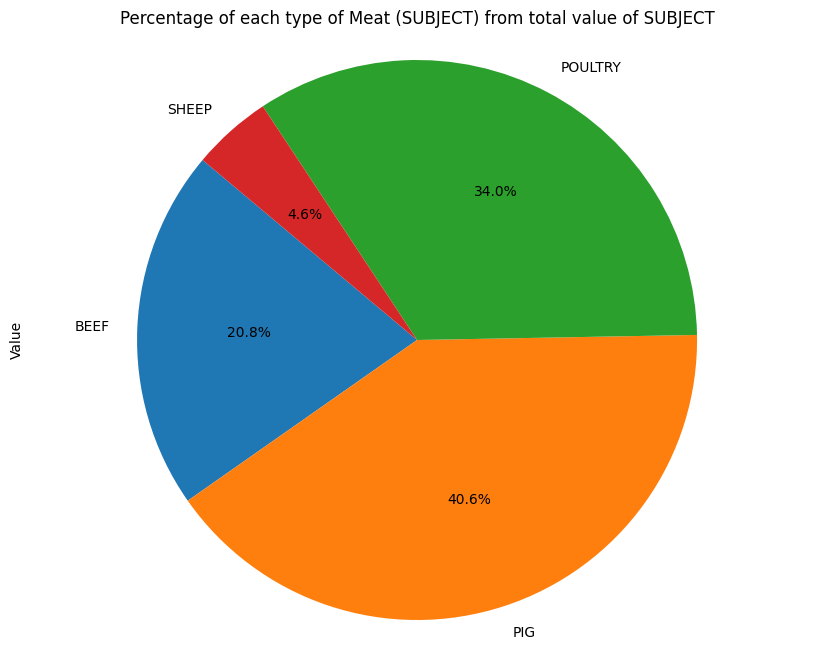

Percentage of each type of Meat (SUBJECT) from total value of SUBJECT:
BEEF: 20.8%
PIG: 40.6%
POULTRY: 34.0%
SHEEP: 4.6%


In [16]:
# Calculate total value for each subject
subject_totals = dMeat.groupby('SUBJECT')['Value'].sum()

# Calculate percentage of each subject from the total value of all subjects
percentage_subjects = (subject_totals / subject_totals.sum()) * 100

# Plot the percentages using a pie chart
plt.figure(figsize=(10, 8))
percentage_subjects.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of each type of Meat (SUBJECT) from total value of SUBJECT')
plt.axis('equal')
plt.show()

# Calculate total value for each subject
subject_totals = dMeat.groupby('SUBJECT')['Value'].sum()

# Calculate percentage of each subject from the total value of all subjects
percentage_subjects = (subject_totals / subject_totals.sum()) * 100

# Print the percentages
print("Percentage of each type of Meat (SUBJECT) from total value of SUBJECT:")
for subject, percentage in percentage_subjects.items():
    print(f"{subject}: {percentage:.1f}%")


*Poultry* makes up the largest portion of the pie chart at 40.6%.

*Pig* comes in second at 34.0%.

*Beef* follows at 20.8%.

*Sheep* comprises the smallest category at 4.6%.

### Mean value for different types of Meat

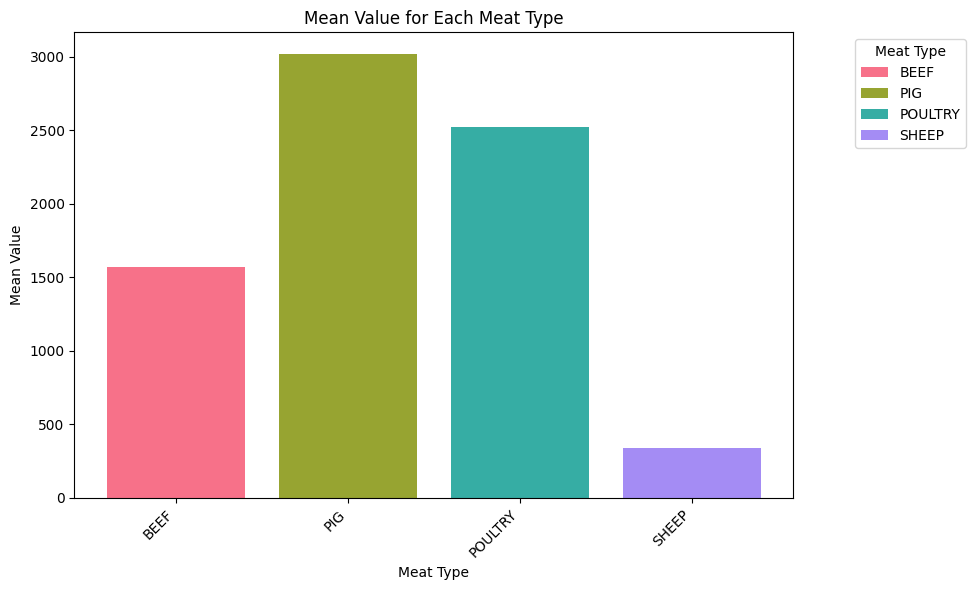

Mean value for BEEF : 1570.6065160570358
Mean value for PIG : 3014.252668041042
Mean value for POULTRY : 2519.348987412063
Mean value for SHEEP : 341.0462123008968


In [17]:
# Dictionary to store mean values for each meat type
mean_values = {}

# Loop through each unique meat type
for meat_type in unique_meat_types:
    # Filter the DataFrame for the current meat type
    meat_data = dMeat[dMeat['SUBJECT'] == meat_type]
    
    # Calculate the mean of the 'Value' column for the current meat type
    mean_value = meat_data['Value'].mean()
    
    # Store the mean value in the dictionary
    mean_values[meat_type] = mean_value
   
# Loop through each unique meat type
for meat_type in unique_meat_types:
    # Filter the DataFrame for the current meat type
    meat_data = dMeat[dMeat['SUBJECT'] == meat_type]
    
    # Calculate the mean of the 'Value' column for the current meat type
    mean_value = meat_data['Value'].mean()
    
    # Store the mean value in the dictionary
    mean_values[meat_type] = mean_value

# Convert dictionary to DataFrame for easier plotting
mean_df = pd.DataFrame.from_dict(mean_values, orient='index', columns=['Mean Value'])

# Define a color palette with different colors for each meat type
color_palette = sns.color_palette('husl', n_colors=len(mean_df))

# Plot the mean values for each meat type with specified colors and create legend
plt.figure(figsize=(10, 6))
for i, (meat_type, color) in enumerate(zip(mean_df.index, color_palette)):
    plt.bar(meat_type, mean_df.loc[meat_type]['Mean Value'], color=color, label=meat_type)

plt.title('Mean Value for Each Meat Type')
plt.xlabel('Meat Type')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')

# Create custom legend
plt.legend(title='Meat Type', loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()

# Print the mean values for each meat type
for meat_type, mean_value in mean_values.items():
    print("Mean value for", meat_type, ":", mean_value)

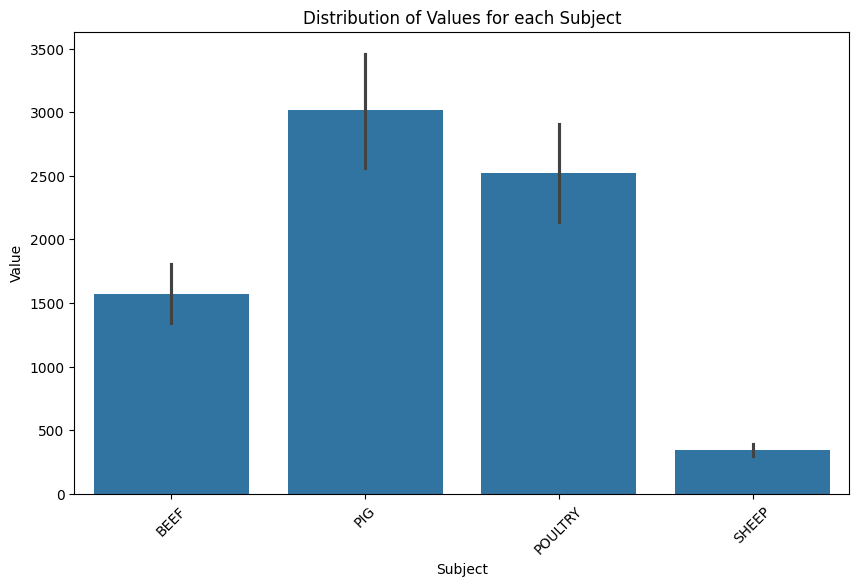

In [18]:
# Bar Plot: Distribution of values for each subject
plt.figure(figsize=(10, 6))
sns.barplot(data=dMeat, x='SUBJECT', y='Value')
plt.title('Distribution of Values for each Subject')
plt.xlabel('Subject')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


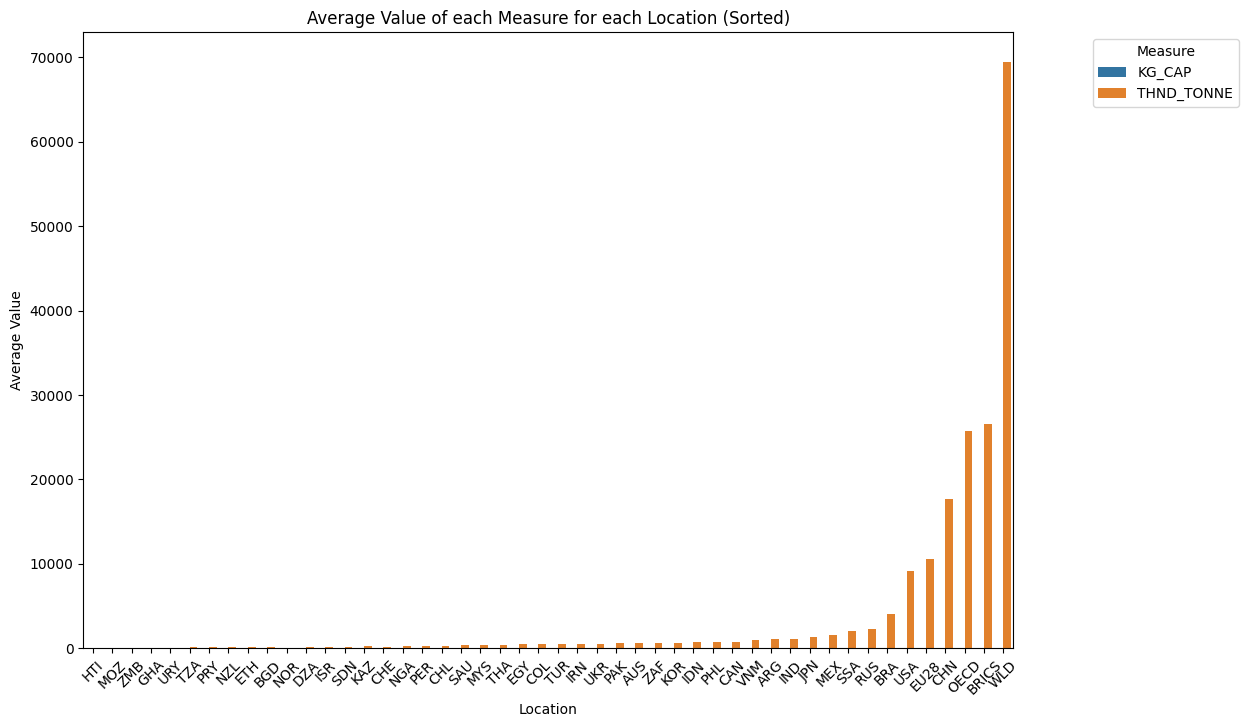

In [19]:
# Calculate average value for each location
average_values = dMeat.groupby('LOCATION')['Value'].mean().reset_index()

# Sort locations by average value
sorted_locations = average_values.sort_values(by='Value')

# Bar plot with sorted locations
plt.figure(figsize=(12, 8))
sns.barplot(data=dMeat, x='LOCATION', y='Value', hue='MEASURE', errorbar=None, order=sorted_locations['LOCATION'])
plt.title('Average Value of each Measure for each Location (Sorted)')
plt.xlabel('Location')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Measure', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

_HTI_ shows the lowest average value
Starting _CAN_ we can see the Average value starts to increase.
*USA, EU28, CHN, OECD, BRICS, & WLD* show the greatest averages possibly due to the following reasons:
- Huge Population Size
- *EU28, OECD, & BRICS* are a collection of several countries not individual countries.

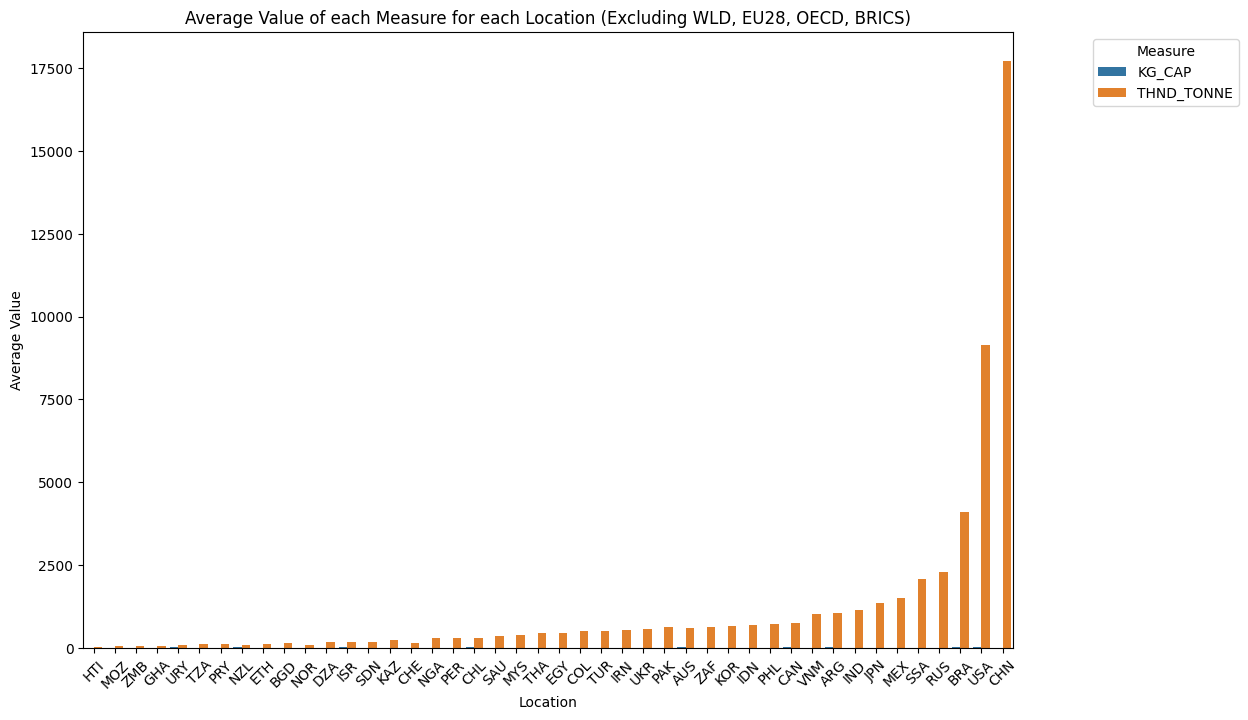

In [20]:
# Define the locations to exclude
exclude_locations = ['WLD', 'EU28', 'OECD', 'BRICS']

# Filter the DataFrame to exclude the specified locations
dMeat_filtered = dMeat[~dMeat['LOCATION'].isin(exclude_locations)]

# Calculate average value for each location
average_values = dMeat_filtered.groupby('LOCATION')['Value'].mean().reset_index()

# Sort locations by average value
sorted_locations = average_values.sort_values(by='Value')

# Bar plot with sorted locations (excluding specified locations)
plt.figure(figsize=(12, 8))
sns.barplot(data=dMeat_filtered, x='LOCATION', y='Value', hue='MEASURE', errorbar=None, order=sorted_locations['LOCATION'])
plt.title('Average Value of each Measure for each Location (Excluding WLD, EU28, OECD, BRICS)')
plt.xlabel('Location')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Measure', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


By removing WLD, EU28, OECD & BRICS we can get a clearer representation of the coutnries that have medium to high-value Average Value.
*HTI* still ahs the least average meanwhile its clearer that after *CAN* the average values start to increase significantly.
*USA & CHN* have the highest Average Value ranging from almost 10000 to 17500.

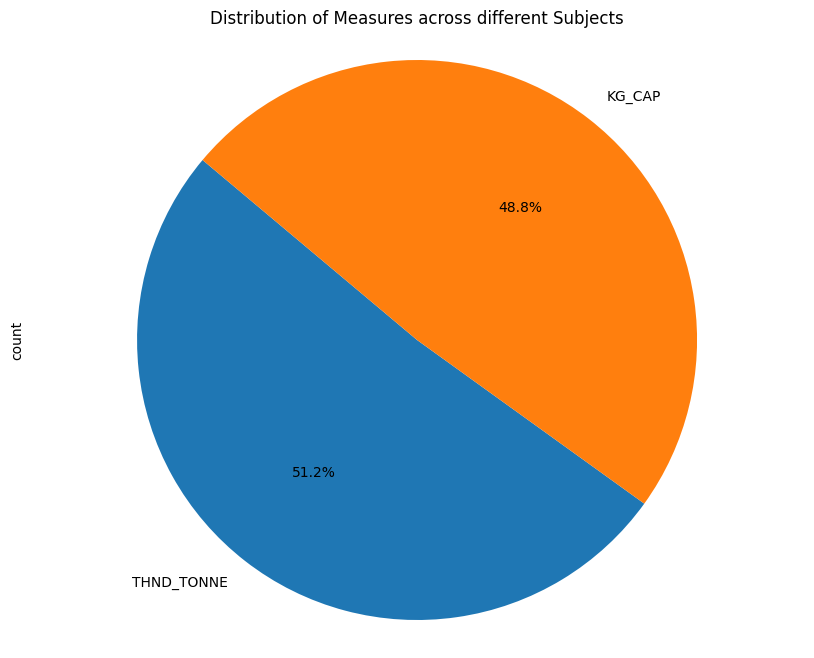

In [21]:
plt.figure(figsize=(10, 8))
dMeat['MEASURE'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Measures across different Subjects')
plt.axis('equal')
plt.show()

### Defining Outliers

In [22]:
#  Identify outliers using summary statistics (for numerical columns)
dMeat.describe()

,TIME,Value
count,13760.000000,1.376000e+04
mean,2008.175291,1.861701e+03
std,10.600740,9.385656e+03
min,1990.000000,1.669000e-09
25%,1999.000000,3.475390e+00
50%,2008.000000,2.313983e+01
75%,2017.000000,2.967790e+02
max,2026.000000,1.316073e+05


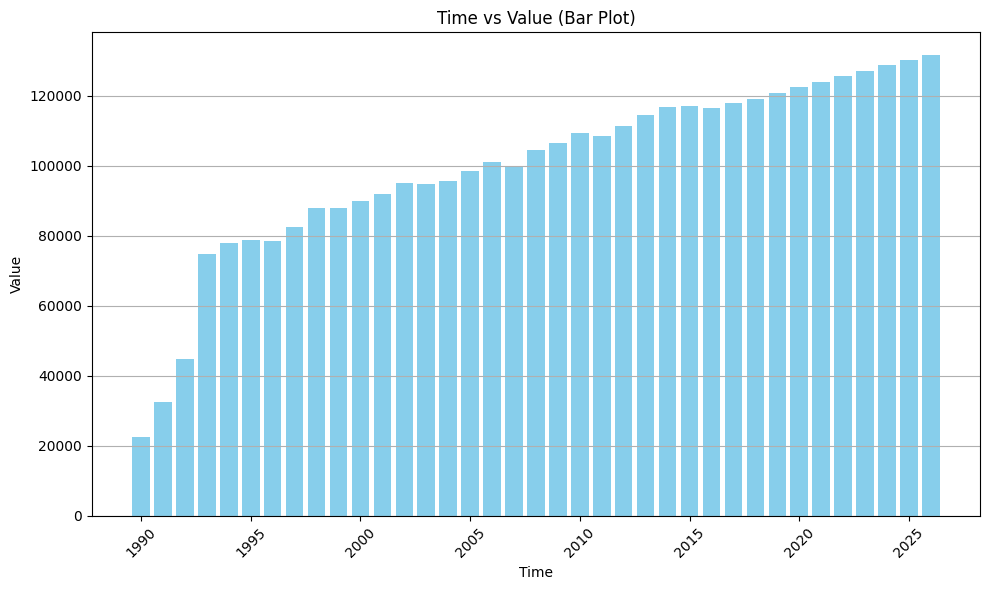

In [23]:
# Sort the DataFrame by 'TIME' if necessary
dMeat_sorted = dMeat.sort_values(by='TIME')

# Plot time vs value as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(dMeat_sorted['TIME'], dMeat_sorted['Value'], color='skyblue')
plt.title('Time vs Value (Bar Plot)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

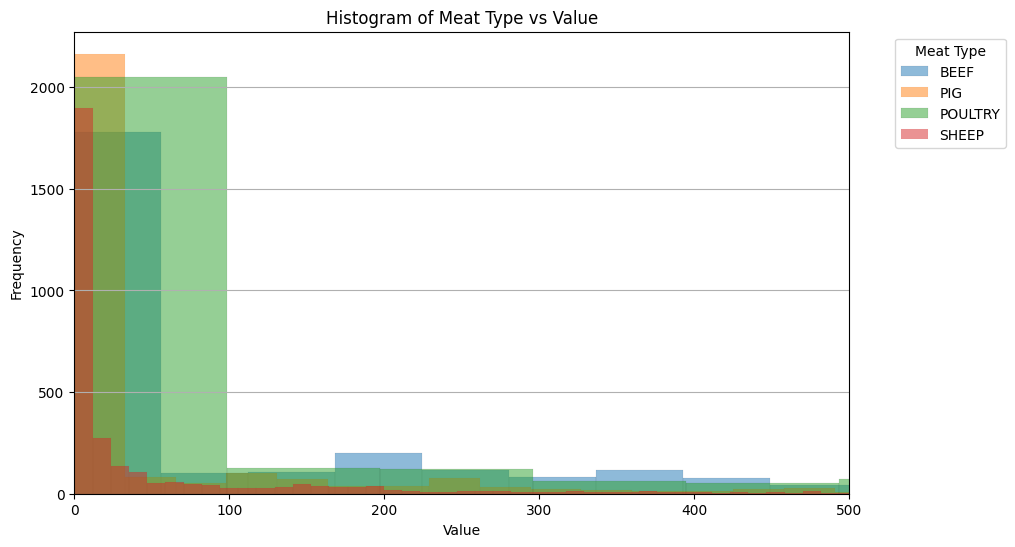

In [24]:
# Get unique meat types (subjects)
meat_types = dMeat['SUBJECT'].unique()

# Plot histogram for meat type vs value
plt.figure(figsize=(10, 6))
for meat_type in meat_types:
    sns.histplot(data=dMeat[dMeat['SUBJECT'] == meat_type], x='Value', label=meat_type, alpha=0.5)

plt.title('Histogram of Meat Type vs Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(title='Meat Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 500)  # Adjust the x-axis limits as needed
plt.grid(axis='y')
plt.show()

In [25]:

# Calculate the first quartile (Q1)
Q1 = dMeat['Value'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = dMeat['Value'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = dMeat[(dMeat['Value'] < lower_bound) | (dMeat['Value'] > upper_bound)]

print("Outliers for Value column:")
print(outliers)


# Filter out outliers
filtered_dMeat = dMeat[(dMeat['Value'] >= lower_bound) & (dMeat['Value'] <= upper_bound)]

# Display the filtered data
print("Data after filtering out outliers:")
print(filtered_dMeat)


Outliers for Value column:
      LOCATION SUBJECT     MEASURE  TIME         Value
6793       KOR     PIG  THND_TONNE  1992    748.999928
6794       KOR     PIG  THND_TONNE  1993    761.999935
6795       KOR     PIG  THND_TONNE  1994    794.999893
6796       KOR     PIG  THND_TONNE  1995    834.999896
6797       KOR     PIG  THND_TONNE  1996    900.999940
...        ...     ...         ...   ...           ...
13718    BRICS    BEEF  THND_TONNE  2022  21341.341213
13719    BRICS    BEEF  THND_TONNE  2023  21555.361442
13720    BRICS    BEEF  THND_TONNE  2024  21715.346084
13721    BRICS    BEEF  THND_TONNE  2025  21927.945960
13722    BRICS    BEEF  THND_TONNE  2026  22209.114084

[2342 rows x 5 columns]
Data after filtering out outliers:
      LOCATION SUBJECT     MEASURE  TIME      Value
0          AUS    BEEF      KG_CAP  1991  27.721815
1          AUS    BEEF      KG_CAP  1992  26.199591
2          AUS    BEEF      KG_CAP  1993  26.169094
3          AUS    BEEF      KG_CAP  1994  25.

Outliers should not be removed, as they are a result of the location beging aggregated to BRICS whihc includes several countries.

In [26]:
filtered_dMeat.describe()

,TIME,Value
count,11418.000000,1.141800e+04
mean,2007.753372,8.179345e+01
std,10.638401,1.498702e+02
min,1990.000000,1.669000e-09
25%,1999.000000,2.429570e+00
50%,2008.000000,1.305203e+01
75%,2017.000000,7.109541e+01
max,2026.000000,7.367261e+02


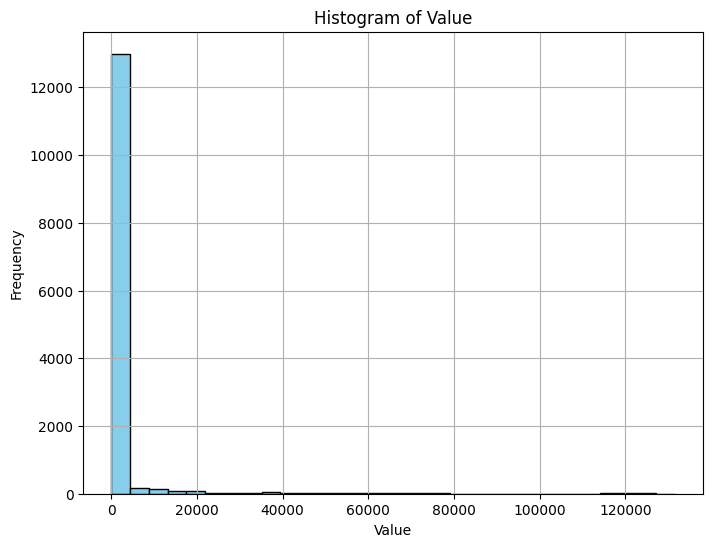

In [27]:
# Create a histogram for the 'Value' column
plt.figure(figsize=(8, 6))
plt.hist(dMeat['Value'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [28]:
# We can still seem to see outliers and data is left-skewed after filtering data so transformation and scaling will be needed.

In [29]:
# Define categorical columns for encoding
categorical_columns = ['LOCATION', 'SUBJECT', 'MEASURE']

# Apply one-hot encoding using pandas and get_dummies
final_df = pd.get_dummies(dMeat, columns=categorical_columns, drop_first=False)

# Check the updated DataFrame with one-hot encoded columns
print(final_df.head())

   TIME      Value  LOCATION_ARG  LOCATION_AUS  LOCATION_BGD  LOCATION_BRA  \
0  1991  27.721815         False          True         False         False   
1  1992  26.199591         False          True         False         False   
2  1993  26.169094         False          True         False         False   
3  1994  25.456134         False          True         False         False   
4  1995  25.340226         False          True         False         False   

   LOCATION_BRICS  LOCATION_CAN  LOCATION_CHE  LOCATION_CHL  ...  \
0           False         False         False         False  ...   
1           False         False         False         False  ...   
2           False         False         False         False  ...   
3           False         False         False         False  ...   
4           False         False         False         False  ...   

   LOCATION_VNM  LOCATION_WLD  LOCATION_ZAF  LOCATION_ZMB  SUBJECT_BEEF  \
0         False         False         False    

In [30]:
final_df.head()

,TIME,Value,LOCATION_ARG,LOCATION_AUS,LOCATION_BGD,LOCATION_BRA,LOCATION_BRICS,LOCATION_CAN,LOCATION_CHE,LOCATION_CHL,...,LOCATION_VNM,LOCATION_WLD,LOCATION_ZAF,LOCATION_ZMB,SUBJECT_BEEF,SUBJECT_PIG,SUBJECT_POULTRY,SUBJECT_SHEEP,MEASURE_KG_CAP,MEASURE_THND_TONNE
0,1991,27.721815,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,1992,26.199591,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,1993,26.169094,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,1994,25.456134,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,1995,25.340226,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13760 entries, 0 to 13759
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TIME                13760 non-null  int64  
 1   Value               13760 non-null  float64
 2   LOCATION_ARG        13760 non-null  bool   
 3   LOCATION_AUS        13760 non-null  bool   
 4   LOCATION_BGD        13760 non-null  bool   
 5   LOCATION_BRA        13760 non-null  bool   
 6   LOCATION_BRICS      13760 non-null  bool   
 7   LOCATION_CAN        13760 non-null  bool   
 8   LOCATION_CHE        13760 non-null  bool   
 9   LOCATION_CHL        13760 non-null  bool   
 10  LOCATION_CHN        13760 non-null  bool   
 11  LOCATION_COL        13760 non-null  bool   
 12  LOCATION_DZA        13760 non-null  bool   
 13  LOCATION_EGY        13760 non-null  bool   
 14  LOCATION_ETH        13760 non-null  bool   
 15  LOCATION_EU28       13760 non-null  bool   
 16  LOCA

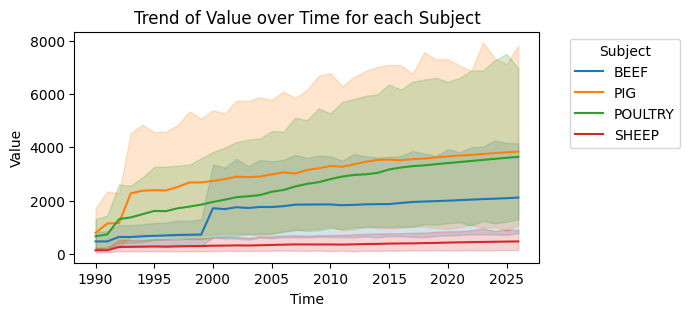

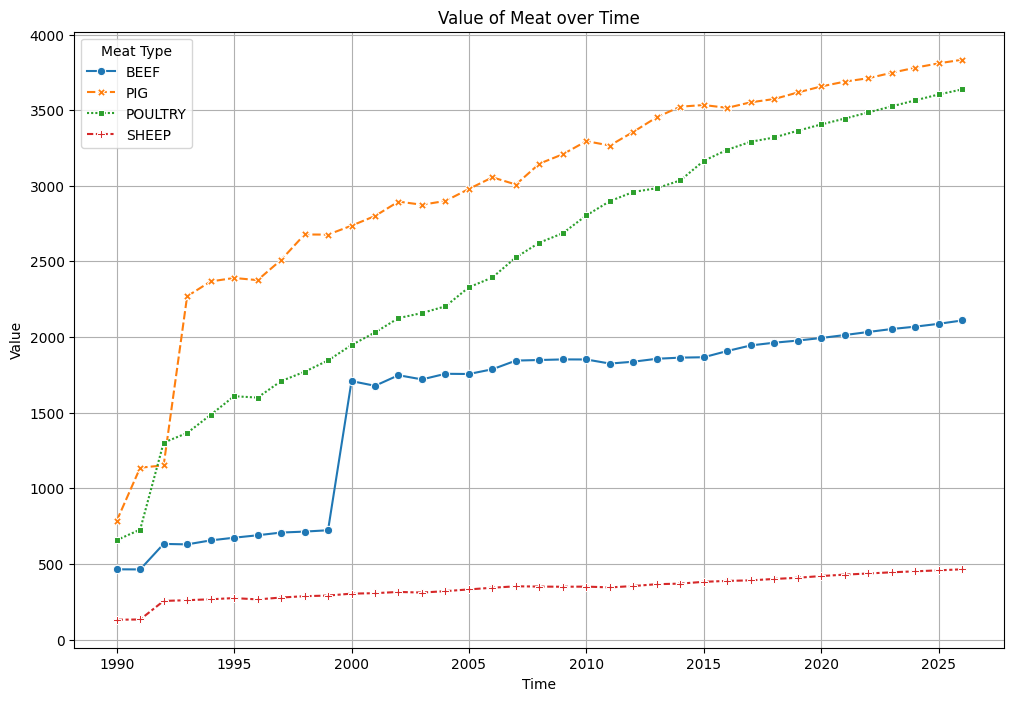

In [32]:
# Line Plot: Trend of value over time for each subject
plt.figure(figsize=(6, 3))
sns.lineplot(data=dMeat, x='TIME', y='Value', hue='SUBJECT')
plt.title('Trend of Value over Time for each Subject')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=dMeat, x='TIME', y='Value', hue='SUBJECT', errorbar=None, markers=True, style='SUBJECT')
plt.title('Value of Meat over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(title='Meat Type', loc='upper left')
plt.grid(True)
plt.show()

*POULTRY AND PIG* Meat have seen a significant increase between 1990 and 1995.
- Value for *POULTRY* increased from around 600 to over 1600 and continued to rise reacheing over 3500  after 2020.
- Value for *PIG* jumped from over 1000 in the 90's to almost 2400 by 1995 and continued to rise reacheing over 3600  after 2020.
- *BEEF* has seen a jump in late 90's from around 600 to over 1500, and continued to rise at a slow rate.
- *SHEEP* has continued to rise at low rate compared to other meats.

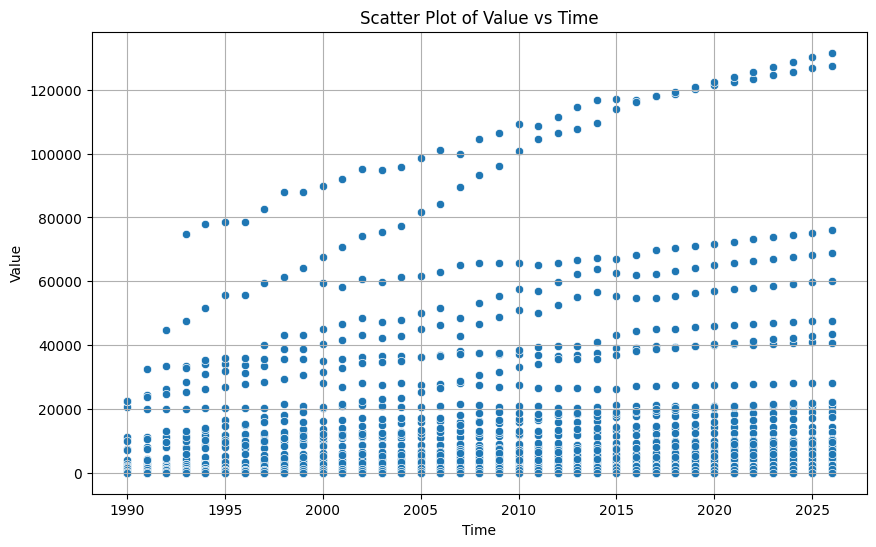

In [33]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dMeat, x='TIME', y='Value')
plt.title('Scatter Plot of Value vs Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

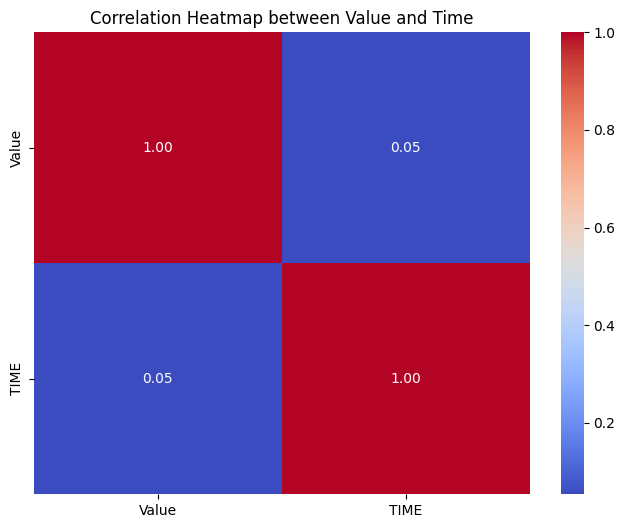

          Value      TIME
Value  1.000000  0.053866
TIME   0.053866  1.000000


In [34]:
# Calculate correlation between 'Value' and 'TIME' columns
correlation = final_df[['Value', 'TIME']].corr()

# Calculate correlation matrix
correlation_matrix = final_df[['Value', 'TIME']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Value and Time')
plt.show()

# Display correlation matrix
print(correlation)


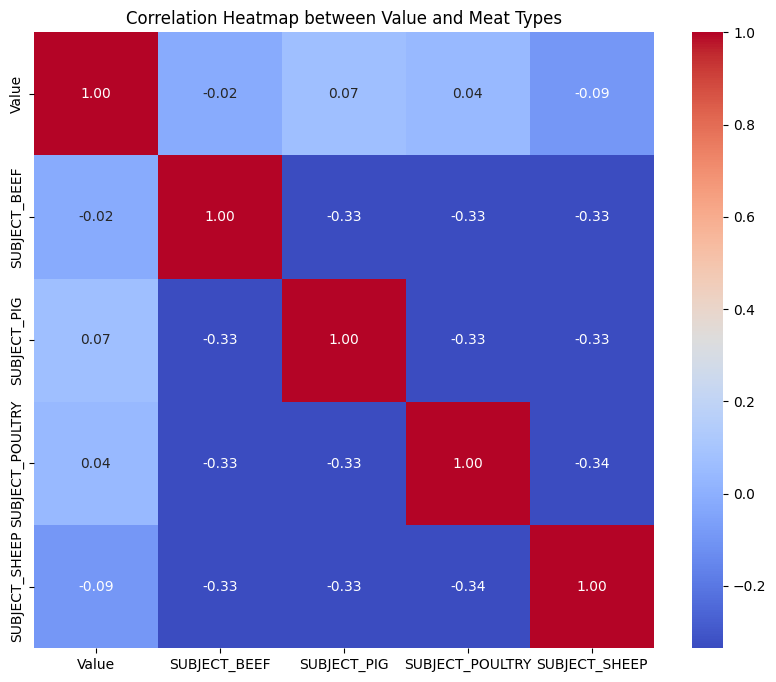

                    Value  SUBJECT_BEEF  SUBJECT_PIG  SUBJECT_POULTRY  \
Value            1.000000     -0.017765     0.070997         0.040589   
SUBJECT_BEEF    -0.017765      1.000000    -0.331133        -0.331774   
SUBJECT_PIG      0.070997     -0.331133     1.000000        -0.334885   
SUBJECT_POULTRY  0.040589     -0.331774    -0.334885         1.000000   
SUBJECT_SHEEP   -0.093853     -0.331774    -0.334885        -0.335533   

                 SUBJECT_SHEEP  
Value                -0.093853  
SUBJECT_BEEF         -0.331774  
SUBJECT_PIG          -0.334885  
SUBJECT_POULTRY      -0.335533  
SUBJECT_SHEEP         1.000000  


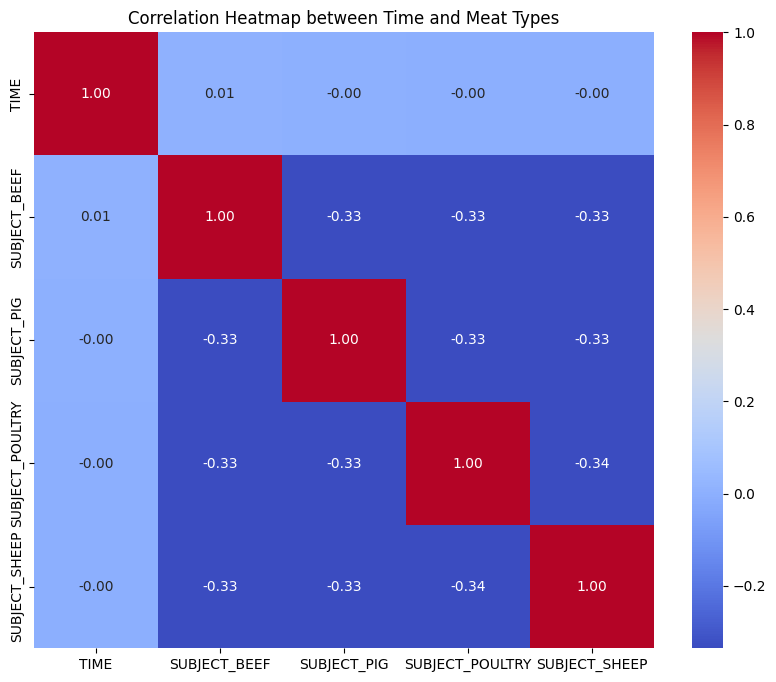

                     TIME  SUBJECT_BEEF  SUBJECT_PIG  SUBJECT_POULTRY  \
TIME             1.000000      0.008698    -0.001095        -0.003778   
SUBJECT_BEEF     0.008698      1.000000    -0.331133        -0.331774   
SUBJECT_PIG     -0.001095     -0.331133     1.000000        -0.334885   
SUBJECT_POULTRY -0.003778     -0.331774    -0.334885         1.000000   
SUBJECT_SHEEP   -0.003778     -0.331774    -0.334885        -0.335533   

                 SUBJECT_SHEEP  
TIME                 -0.003778  
SUBJECT_BEEF         -0.331774  
SUBJECT_PIG          -0.334885  
SUBJECT_POULTRY      -0.335533  
SUBJECT_SHEEP         1.000000  


In [35]:
# Select columns for correlation analysis
columns_for_correlation_value = ['Value', 'SUBJECT_BEEF', 'SUBJECT_PIG', 'SUBJECT_POULTRY', 'SUBJECT_SHEEP']

# Calculate correlation matrix for value and meat types
correlation_matrix_value = final_df[columns_for_correlation_value].corr()

# Plot correlation heatmap for value and meat types
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_value, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Value and Meat Types')
plt.show()
print(correlation_matrix_value)

# Select columns for correlation analysis
columns_for_correlation_time = ['TIME', 'SUBJECT_BEEF', 'SUBJECT_PIG', 'SUBJECT_POULTRY', 'SUBJECT_SHEEP']

# Calculate correlation matrix for time and meat types
correlation_matrix_time = final_df[columns_for_correlation_time].corr()

# Plot correlation heatmap for time and meat types
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_time, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Time and Meat Types')
plt.show()
print(correlation_matrix_time)

In [36]:
# Separate features (X) and target variable (y)
X = final_df.drop(columns=['Value'])  # Features: Drop the target column
y = final_df['Value']  # Target variable

# Display the shape of X and y to confirm
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (13760, 55)
Shape of y: (13760,)


In [37]:
# Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (11008, 55)
Test data shape: (2752, 55)


In [38]:
Xscaler = StandardScaler()
X_train_scaled = Xscaler.fit_transform(X_train)
X_test_transformed = Xscaler.transform(X_test)